In [4]:
import pandas as pd
import numpy as np
%matplotlib inline  
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import warnings
import seaborn as sns
warnings.filterwarnings(action='ignore')

In [5]:
# Load the dataset (adjust file path and format as needed)
df = pd.read_csv(r"C:\Users\prakh\Desktop\Research_Project\satellite_data\orbital_elements\Fengyun-2F.csv", parse_dates=[0])  # Assuming first column is datetime

# Rename columns to remove spaces
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Convert datetime column to proper format (if not done already)
#df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], dayfirst=True)  # Adjust based on date format

# Convert numeric columns to float (excluding datetime column)
#df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors="coerce")

# Handle missing values (fill or drop)
#df.dropna(inplace=True)  # Or df.fillna(value, inplace=True)

# Display processed data
print(df.head())

# Save cleaned data
df.to_csv("cleaned_data.csv", index=False)
df.rename(columns={'Unnamed:_0':'Datetime'},inplace=True)
df.set_index("Datetime",inplace=True)

                  Unnamed:_0  eccentricity  argument_of_perigee  inclination  \
0 2012-09-06 18:48:32.050655      0.000488             4.483911     0.032940   
1 2012-09-07 19:39:45.383327      0.000487             4.481215     0.032901   
2 2012-09-08 15:43:39.075167      0.000487             4.475122     0.032868   
3 2012-09-09 12:53:36.595967      0.000492             4.481063     0.032835   
4 2012-09-10 13:15:22.135391      0.000495             4.512943     0.032798   

   mean_anomaly  Brouwer_mean_motion  right_ascension  
0     -2.689729             0.004374         4.842139  
1     -2.446726             0.004374         4.842234  
2     -3.457326             0.004374         4.842332  
3     -4.190783             0.004374         4.842201  
4     -4.111348             0.004374         4.842257  


In [18]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2985   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 6      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ eccentri │  0 │    0 │ 0.000268 │ 0.000140 │ 1.62e-05 │ 0.000164 │ 0.000253 │ 0.000359 │ 0.002877 │   ▇    │  │
│ │ city     │    │      │          │        7 │          │        1 │        5 │        5 │          │        │  │
│ │ argument │  0 │    0 │    3.081 │    1.578 │ 0.002423 │    1.881 │    3.513 │    4.236 │    6.283 │ ▅▂▃▇▆▁ │  │
│ │ _of_peri │    │      │          │          │          │          │          │          │          │        │  │
│ │ gee      │    │      │          │          │          │          │          │          │          │        │  │
│ │ inclinat │  0 │    0 │  0.02701 │  0.01448 │ 0.002838 │  0.01557 │  0.02606 │  0.03834 │  0.05956 │ ▇▇▇▆▅▂ │  │
│ │ ion      │    │      │          │          │          │          │          │          │          │        │  │
│ │ mean_ano │  0 │    0 │   -3.231 │    1.783 │   -6.281 │   -4.663 │   -3.433 │   -1.669 │ -0.00233 │ ▆▇▇▆▆▆ │  │
│ │ maly     │    │      │          │          │          │          │          │          │        7 │        │  │
│ │ Brouwer_ │  0 │    0 │ 0.004375 │ 3.378e-0 │ 0.004374 │ 0.004375 │ 0.004375 │ 0.004375 │ 0.004376 │  ▁▇▇▇  │  │
│ │ mean_mot │    │      │          │        7 │          │          │          │          │          │        │  │
│ │ ion      │    │      │          │          │          │          │          │          │          │        │  │
│ │ right_as │  0 │    0 │    2.188 │    1.567 │ 0.003768 │     1.36 │    1.424 │    1.458 │    6.202 │  ▇  ▂  │  │
│ │ cension  │    │      │          │          │          │          │          │          │          │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<Axes: ylabel='Frequency'>

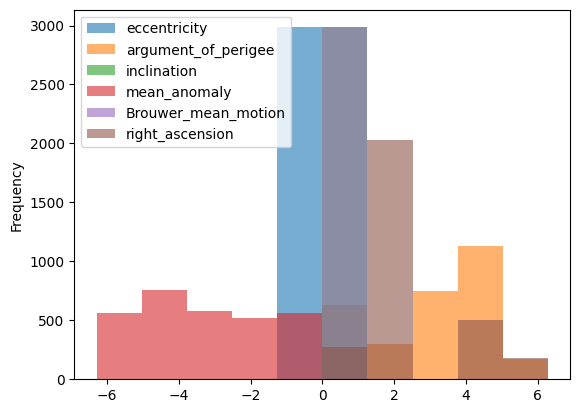

In [19]:
df.plot.hist(alpha=0.6)

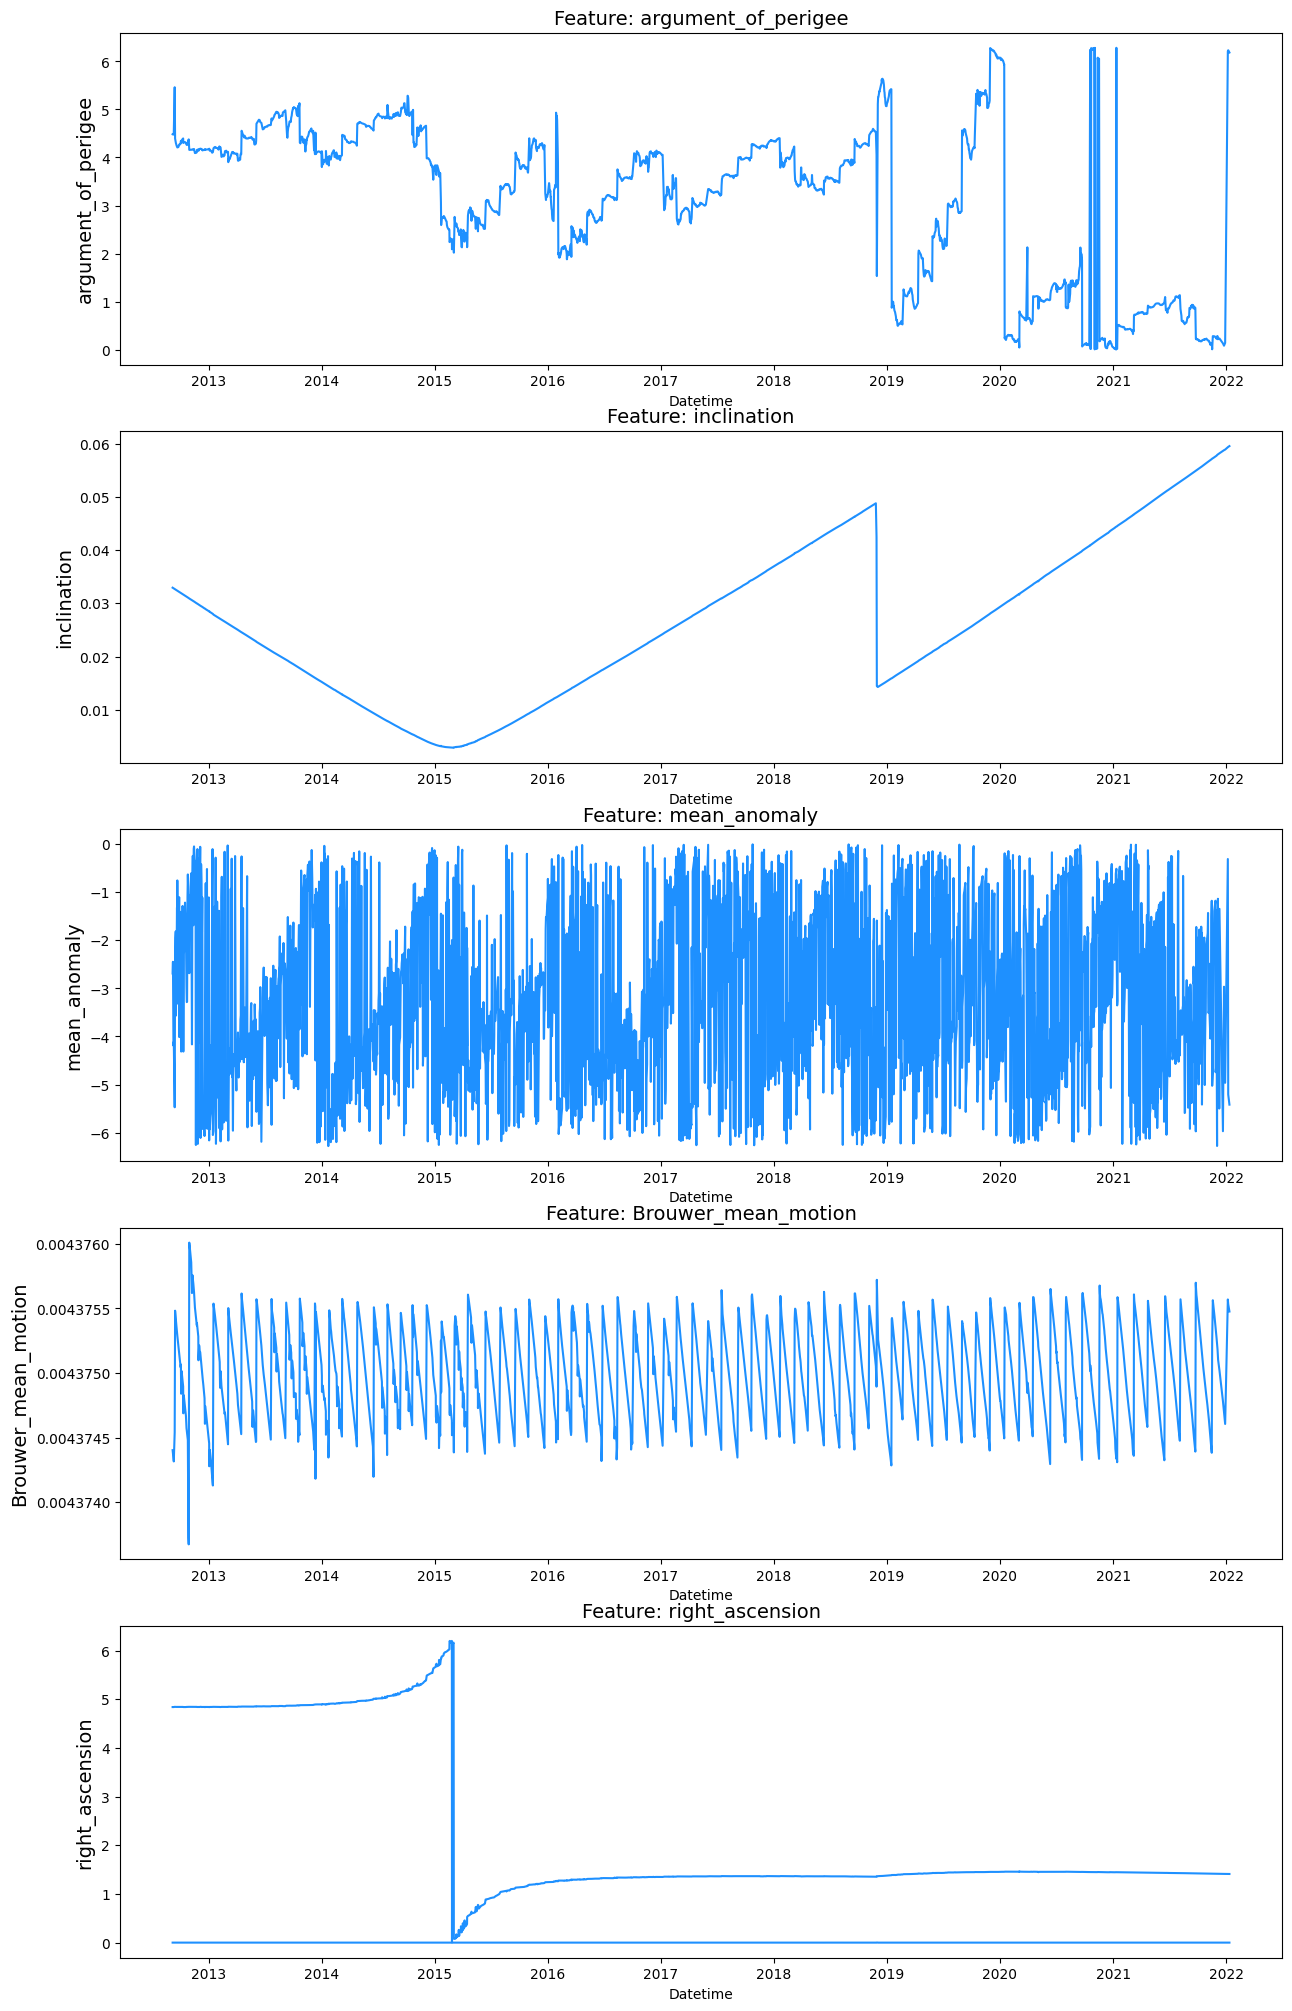

In [17]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.columns):
    sns.lineplot(x=df.index, y=df[column].fillna(method='ffill'), ax=ax[i-1], color='dodgerblue')
    ax[i-1].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i-1].set_ylabel(ylabel=column, fontsize=14)
                      
   #ax[i].set_xlim(df.index, df)                

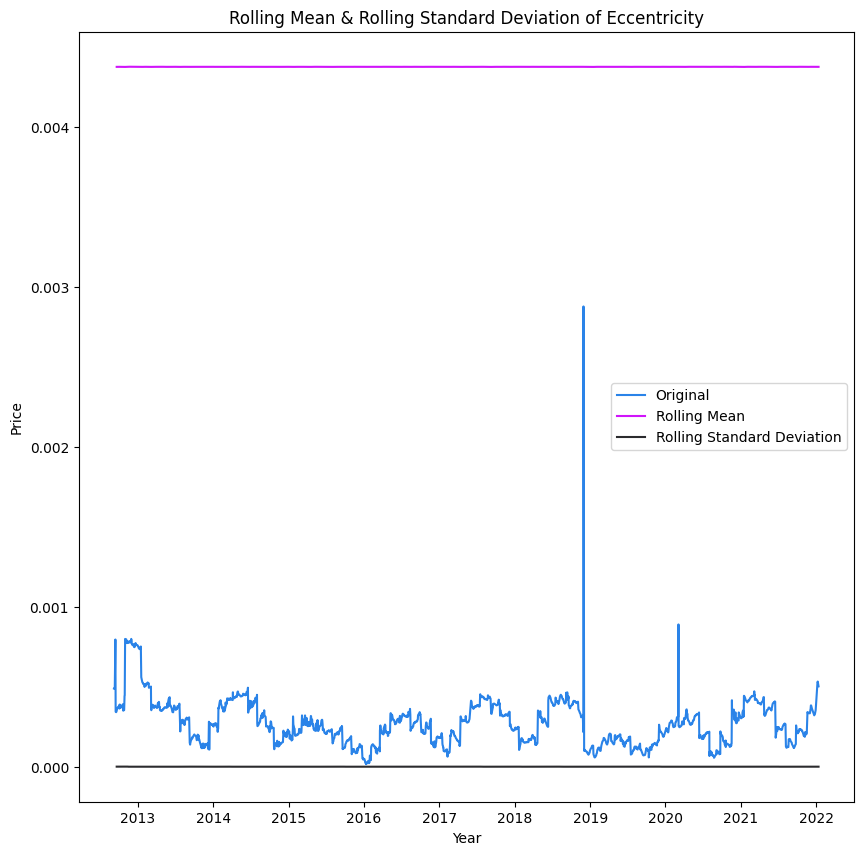

In [23]:
rolling_mean_Brouwer_mean_motion= df[:]['Brouwer_mean_motion'].rolling(window=12).mean()
rolling_std_Brouwer_mean_motion= df[:]['Brouwer_mean_motion'].rolling(window=12).std()

plt.figure(figsize=(10,10))

plt.plot(df[:]['eccentricity'], color = '#2a83e8', label = 'Original') #BLUE


plt.plot(rolling_mean_Brouwer_mean_motion, color = '#d014fa', label = 'Rolling Mean') #PINK
plt.plot(rolling_std_Brouwer_mean_motion, color = '#2b2b2e', label = 'Rolling Standard Deviation')  #BLACK

#plt.plot(rolling_mean_argument_of_perigee, color = '#a633ff', label = 'Rolling Mean') #PURPLR
#plt.plot(rolling_std_argument_of_perigee, color = '#ffd700', label = 'Rolling Standard Deviation') #YELLOW

plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Price') 
plt.title('Rolling Mean & Rolling Standard Deviation of Eccentricity')
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df[:]['Brouwer_mean_motion'].values)
result

(np.float64(-16.445761701941194),
 np.float64(2.4041995897201638e-29),
 27,
 2957,
 {'1%': np.float64(-3.432563387143659),
  '5%': np.float64(-2.8625179291294662),
  '10%': np.float64(-2.5672905782716513)},
 np.float64(-83733.16131826141))

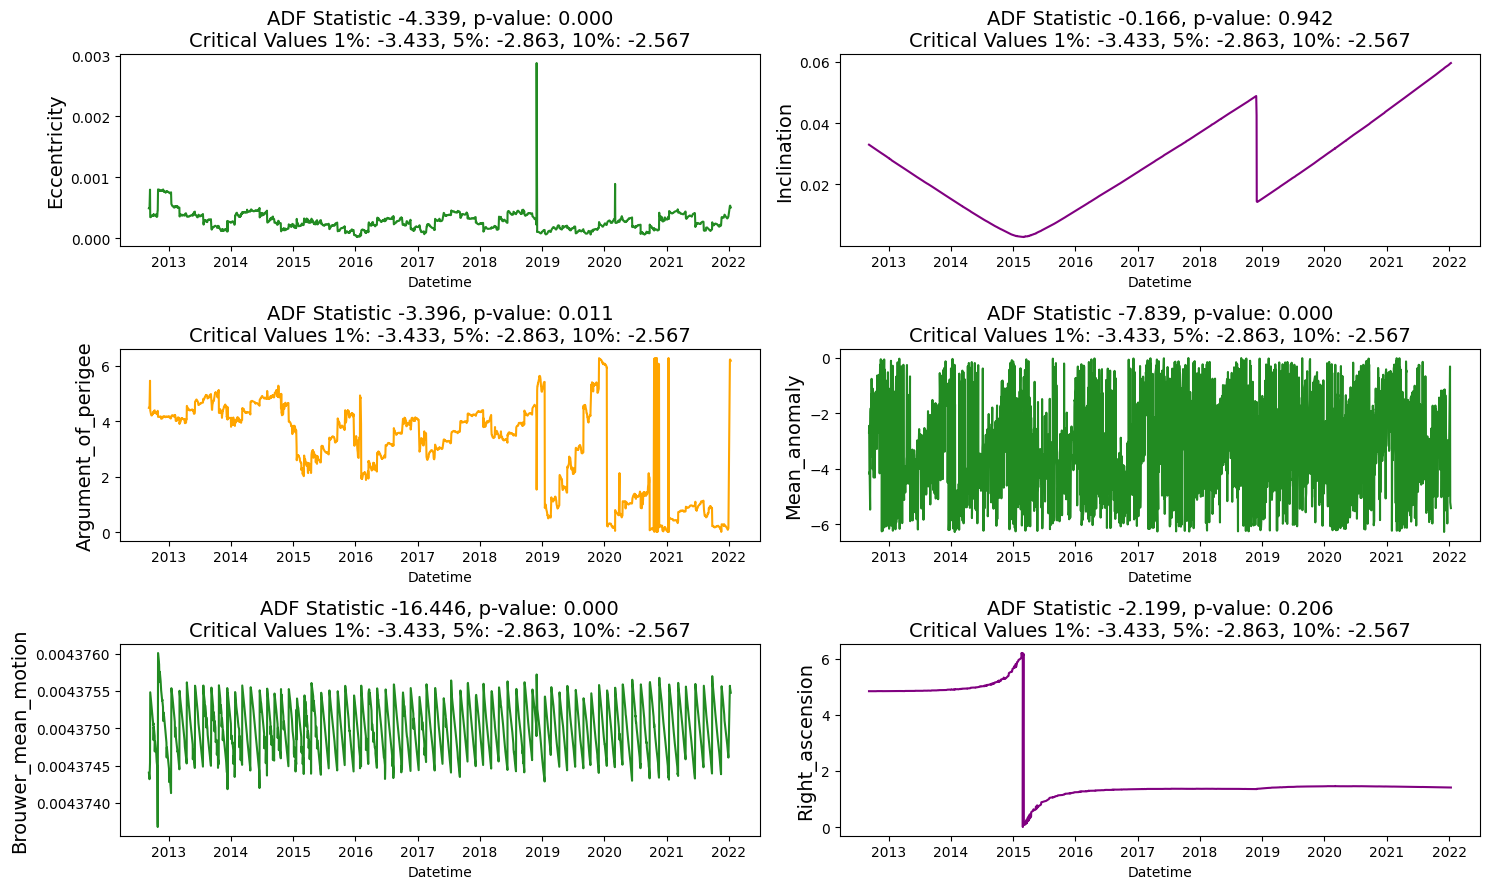

In [34]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df[:]['eccentricity'].values, 'Eccentricity', ax[0, 0])
visualize_adfuller_results(df[:]['argument_of_perigee'].values, 'Argument_of_perigee', ax[1, 0])
visualize_adfuller_results(df[:]['inclination'].values, 'Inclination', ax[0, 1])
visualize_adfuller_results(df[:]['mean_anomaly'].values, 'Mean_anomaly', ax[1, 1])
visualize_adfuller_results(df[:]['Brouwer_mean_motion'].values, 'Brouwer_mean_motion', ax[2, 0])
visualize_adfuller_results(df[:]['right_ascension'].values, 'Right_ascension', ax[2, 1])


plt.tight_layout()
plt.show()

<Axes: xlabel='eccentricity_log', ylabel='Density'>

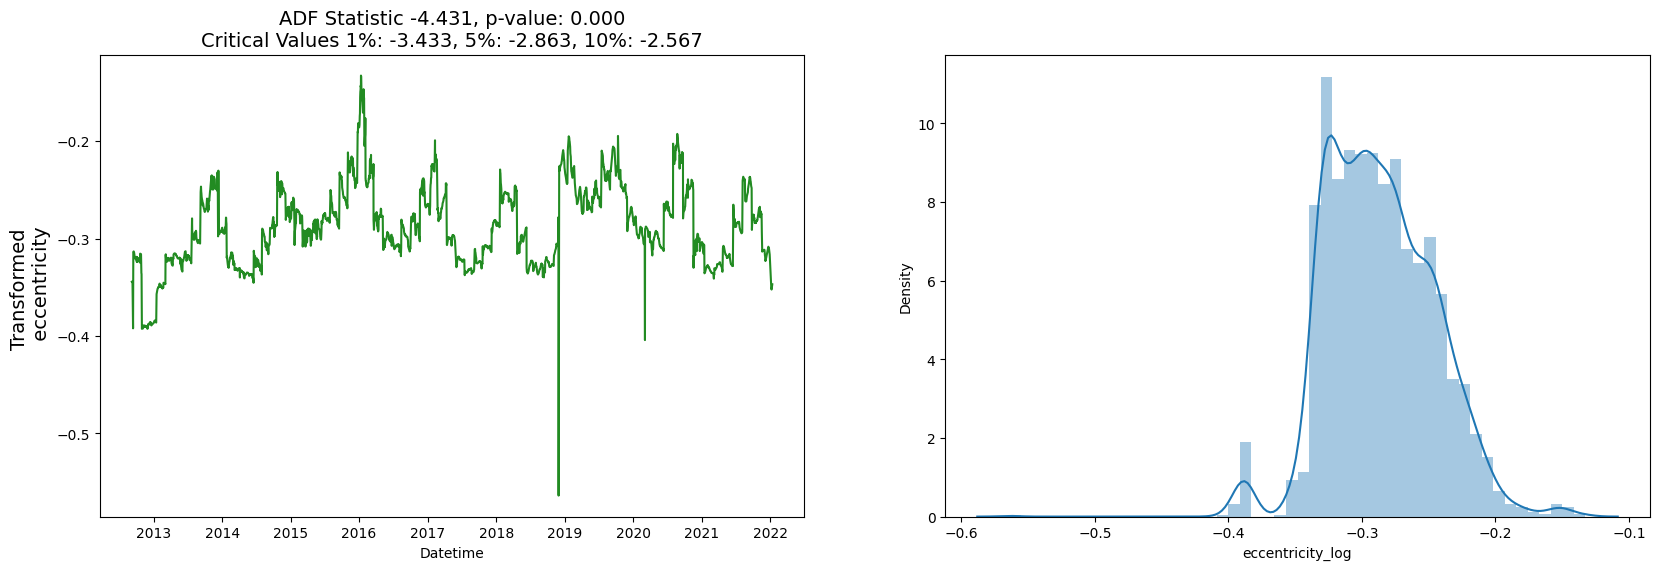

In [38]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['eccentricity_log'] = np.log(abs(df['eccentricity']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
visualize_adfuller_results(df['eccentricity_log'], 'Transformed \n eccentricity', ax[0])

sns.distplot(df['eccentricity_log'], ax=ax[1])

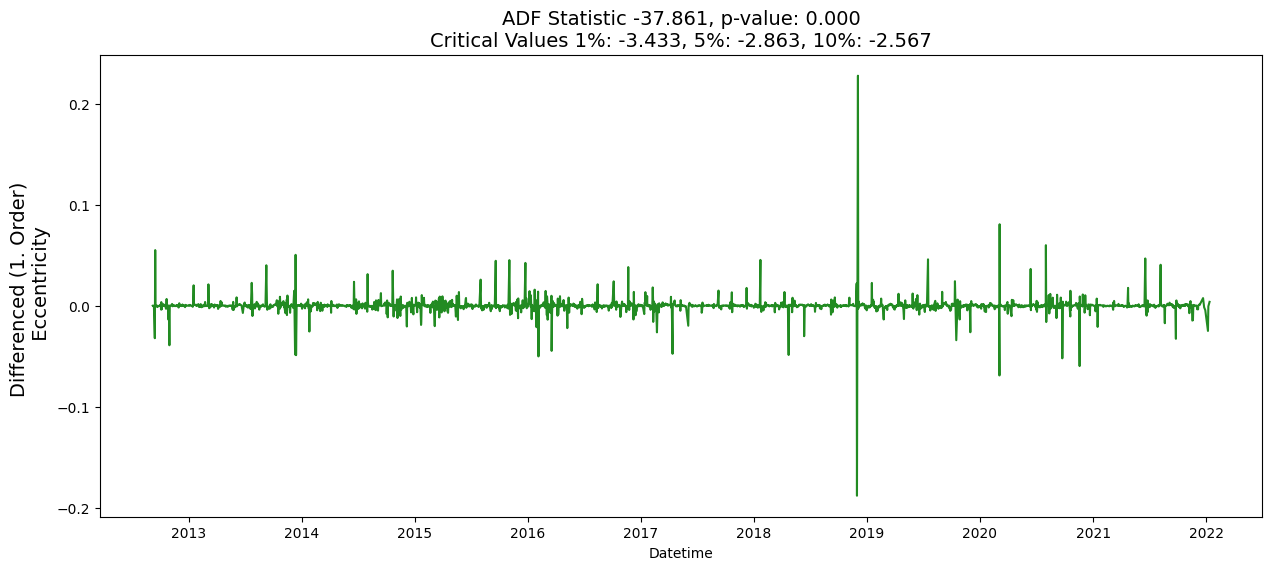

In [39]:
# First Order Differencing
ts_diff = np.diff(df['eccentricity'])
df['eccentricity_diff_1'] = np.append([0], ts_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(df['eccentricity_diff_1'], 'Differenced (1. Order) \n Eccentricity', ax)

In [49]:
df['date'] = pd.DatetimeIndex(df.index).date
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day'] = pd.DatetimeIndex(df.index).day
df['day_of_year'] = pd.DatetimeIndex(df.index).dayofyear
#df['week_of_year'] = pd.DatetimeIndex(df.index).weekofyear
df['quarter'] = pd.DatetimeIndex(df.index).quarter
df['season'] = df['month'] % 12 // 3 + 1

#df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

df[['date','year', 'month', 'day', 'day_of_year', 'quarter', 'season']].head()

,date,year,month,day,day_of_year,quarter,season
Datetime,,,,,,,
2012-09-06 18:48:32.050655,2012-09-06,2012,9,6,250,3,4
2012-09-07 19:39:45.383327,2012-09-07,2012,9,7,251,3,4
2012-09-08 15:43:39.075167,2012-09-08,2012,9,8,252,3,4
2012-09-09 12:53:36.595967,2012-09-09,2012,9,9,253,3,4
2012-09-10 13:15:22.135391,2012-09-10,2012,9,10,254,3,4


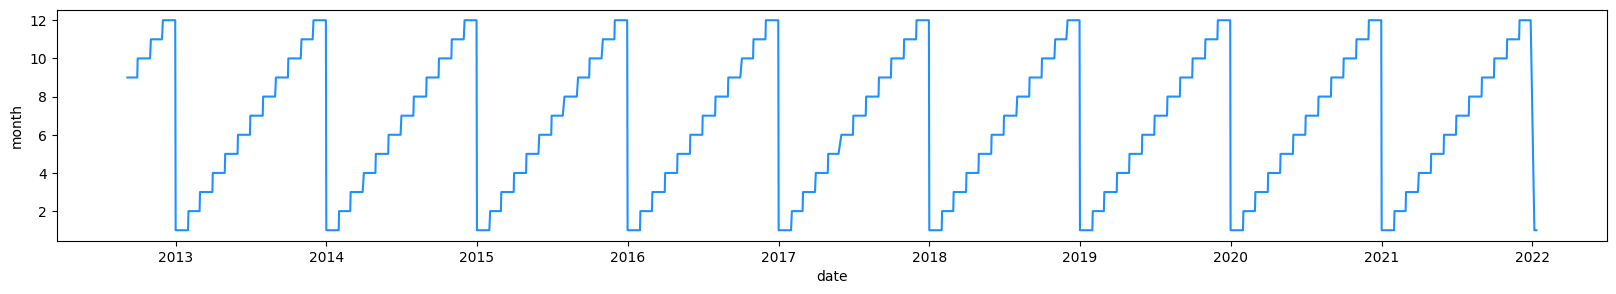

In [53]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=df['date'], y=df['month'], color='dodgerblue')
#ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

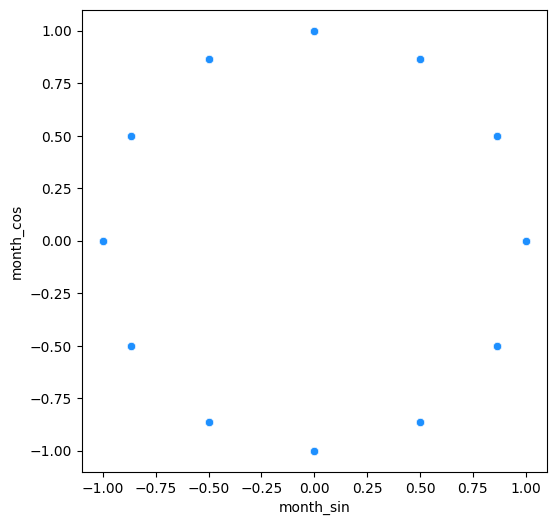

In [54]:
month_in_year = 12
df['month_sin'] = np.sin(2*np.pi*df['month']/month_in_year)
df['month_cos'] = np.cos(2*np.pi*df['month']/month_in_year)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.scatterplot(x=df.month_sin, y=df.month_cos, color='dodgerblue')
plt.show()

In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'eccentricity', 'argument_of_perigee', 'inclination', 
   'mean_anomaly', 'Brouwer_mean_motion', 'right_ascension'
]

for column in core_columns:
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

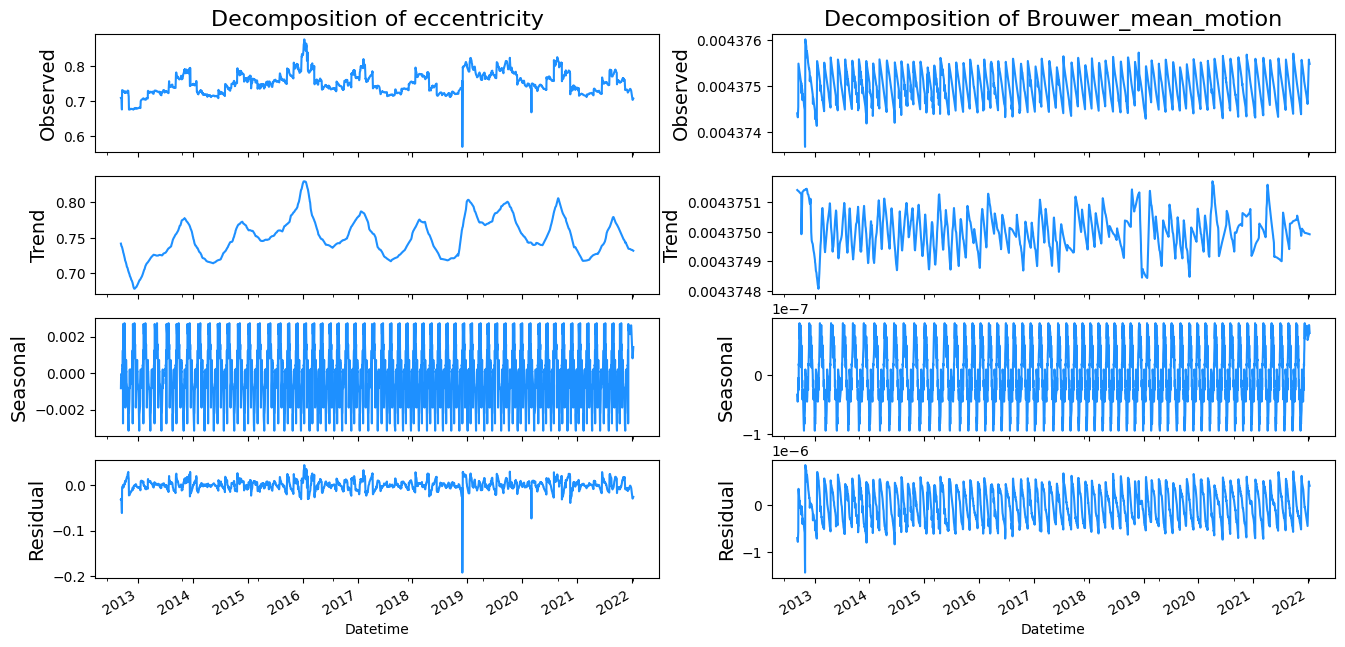

In [57]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

for i, column in enumerate(['eccentricity', 'Brouwer_mean_motion']):
    
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()